
<h1><center>Analyzing Marketing Campaign!</center></h1>


<h2><center>How coupon marketing can help shape your business?</center></h2>

Accoring to [wikibuy](https://wikibuy.com/blog/coupon-statistics-4c49b386c833), 90% of consumers use coupons and by 2022, digital coupon redemption will reach $91 billion


By studying coupon dataset, we can answers questions such as, **what type of customers are shopping in my business? which coupon delivery method drives more consumers to the bussiness, and how much coupon value to give to customers and maintain profit?**

Using IBM dataset, we will help answer those questions

<h3><center>Importing the necessary library!</center></h3>

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3><center>Load the dataset</center></h3>

In [399]:
data = pd.read_csv("WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS.csv", index_col="storeid")

In [400]:
print("Here is the first five rows and colums of the datset")
data.head()

Here is the first five rows and colums of the datset


,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent
storeid,,,,,,,,,,,,,,
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,1,"2,4,1,3",0,05 percent,135.24
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,2,"2,4,1,3",2,25 percent,128.65
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,3,"2,4,1,3",4,00 No value,112.86
1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,4,"2,4,1,3",1,15 percent,130.14
1,Regular store,Medium,No emphasis,9245-DEZSB,Male,Self and family,No,Weekly; similar items,From mailings,1,"4,3,2,1",0,25 percent,155.61


In [401]:
print('The number of rows is {} and the number of colums is {}'.format(data.shape[0], data.shape[1]))

The number of rows is 1496 and the number of colums is 14


In [402]:
data.describe()

,week,CarryOver,AmountSpent
count,1496.000000,1496.000000,1496.000000
mean,2.500000,1.870989,118.494820
std,1.118408,1.451582,55.197293
min,1.000000,0.000000,0.000000
25%,1.750000,0.750000,96.810000
50%,2.500000,2.000000,118.860000
75%,3.250000,3.000000,140.955000
max,4.000000,4.000000,353.760000


##### The result above allows us to verify that no data is missing. The total number of element in each row and colums is the same by looking at count. To enuser some of the data is not missing, running isnull() will help detect any missing values

In [403]:
no_missing_cols = set(data.columns[data.isnull().mean() == 0])
print("The number of colums with no missing values are \033[1m:", ', '.join(no_missing_cols))

The number of colums with no missing values are : AmountSpent, StoreLayout, ShoppingStyle, WhoShoppingFor, week, Vegetarian, CouponValue, CouponSequence, gender, StoreSize, HealthyStore, CarryOver, customerID, CouponUser


<h3><center>Plot chart and results</center></h3>

Using correlation, we can check the relationship between rows and columns in the dataset. in the sample data, we will look into the Pearson correlation. The correlation has a max value of 1 and a min value of -1 in general. if the the value is 1, there is a strong positive correlation. This means that if one variable increases the other increase as well. This applies when the value is -1 but the two values are inversely proportional. 

Note: The correlation below tells us that there 0.57 correlation between CarryOver and week

In [404]:
data_corr = data.corr(method="pearson")
data_corr

,week,CarryOver,AmountSpent
week,1.000000,0.579916,-0.020950
CarryOver,0.579916,1.000000,-0.054447
AmountSpent,-0.020950,-0.054447,1.000000


Now, let's use the seaborn heatmap to create a visualization for the correlation. 
The heatmap displays the same values above but add color that can help when identifying object with high and low correlation

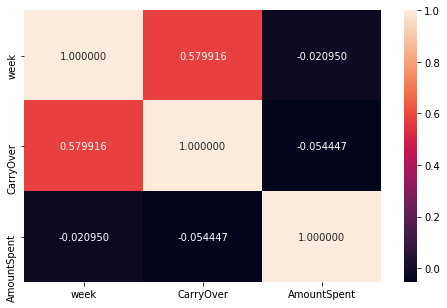

In [405]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
sns.heatmap(data_corr, annot=True, fmt="f");

<h4><center>Visualizing Categorical Data</center></h4>

We can use visuals to find out what percentage of the customers of the store is **Vegetarian and non Vegetarian**.
Notice below that people that identify as non vegetarian constitute more than 80% of the customers. 

1. Vegetarian/non Vegetarian
    This graph can help us to look into why is the number is low in terms of vegetarian participation in the store. The answer     can be related to several things such as Store location. Is the store located in area where people strongly support? another question that should be look into is the vegetarian products that the store offers meets the locals desire?
<br>
<br>
2. Female/Male
    The second graph below shows the Female to Male ratio. The graph shows that there are more Males shoppers than Females shopper. Again Why? This will lead the store owner to investigate the products that are being sold. Do the products match the neighborhood tastes? Should we offer more discount on Females products to attract a diverse customers?

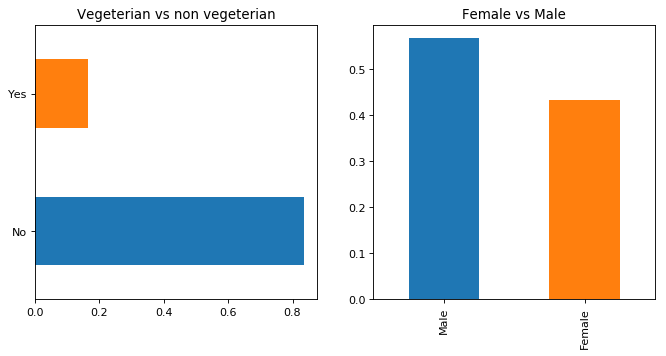

In [406]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
vegeterian_ratio = data.Vegetarian.value_counts()
(vegeterian_ratio/data.shape[0]).plot(kind="barh");
plt.title("Vegeterian vs non vegeterian");

plt.subplot(2, 2, 2)
genre_ratio = data.gender.value_counts()
(genre_ratio/data.shape[0]).plot(kind="bar");
plt.title("Female vs Male");

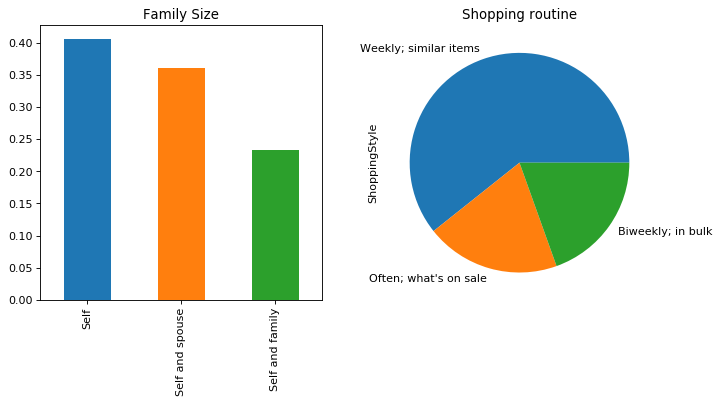

In [407]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
shopping_size = data.WhoShoppingFor.value_counts()
(shopping_size/data.shape[0]).plot(kind="bar");
plt.title("Family Size");

plt.subplot(2, 2, 4)
ShoppingStyle = data.ShoppingStyle.value_counts();
(ShoppingStyle/data.shape[0]).plot(kind="pie");
plt.title("Shopping routine");


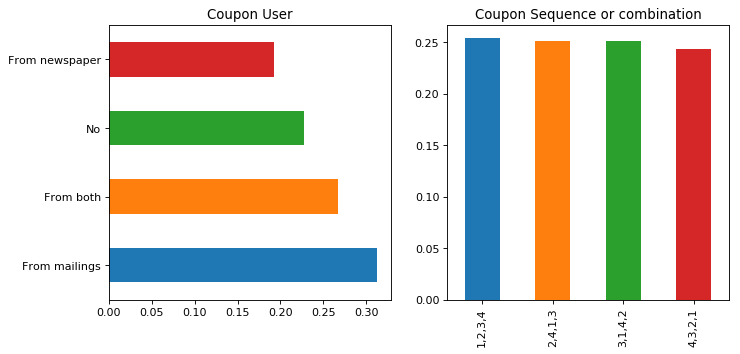

In [408]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
CouponUser = data.CouponUser.value_counts()
(CouponUser/data.shape[0]).plot(kind="barh");
plt.title("Coupon User");

plt.subplot(2, 2, 4)
CouponSequence = data.CouponSequence.value_counts()
(CouponSequence/data.shape[0]).plot(kind="bar");
plt.title("Coupon Sequence or combination");

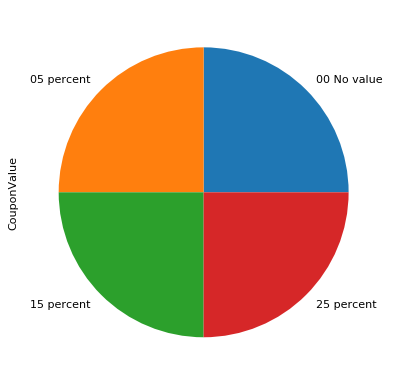

In [409]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
CouponValue = data.CouponValue.value_counts();
(CouponValue/data.shape[0]).plot(kind="pie");